In [1]:
import pickle
with open('surv_dims.pkl', 'rb') as f:
    surv_dims = pickle.load(f)
    

with open('all_data.pkl', 'rb') as f:
    all_data = pickle.load(f)

In [36]:
import pandas as pd
data = pd.read_csv('Guess the elbow.csv')
data = data.drop(['Timestamp'], axis=1)

In [37]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,3,2,2,5,12,2,5,2,3,2,...,2,3,5,6,2,2,2,5,2,3
1,2,3,2,5,10,2,5,2,4,2,...,3,8,5,7,2,2,3,5,2,8
2,1,1,1,4,12,1,5,1,5,1,...,1,8,4,7,1,2,1,5,1,2
3,2,3,2,5,5,2,5,2,5,1,...,3,8,5,7,2,2,2,5,2,8


In [38]:
true = [int(x) for x in list(data.median(axis = 0))]

Using the basic error caluculation $\frac{Expected - True}{True}$

In [67]:
import numpy as np
error = []
for k in range(data.shape[0]): 
    c = [(j-i)/i if i != 0 else None for i,j in zip(true, data.iloc[k])]
    error.append(c)
error = np.asarray(error)  

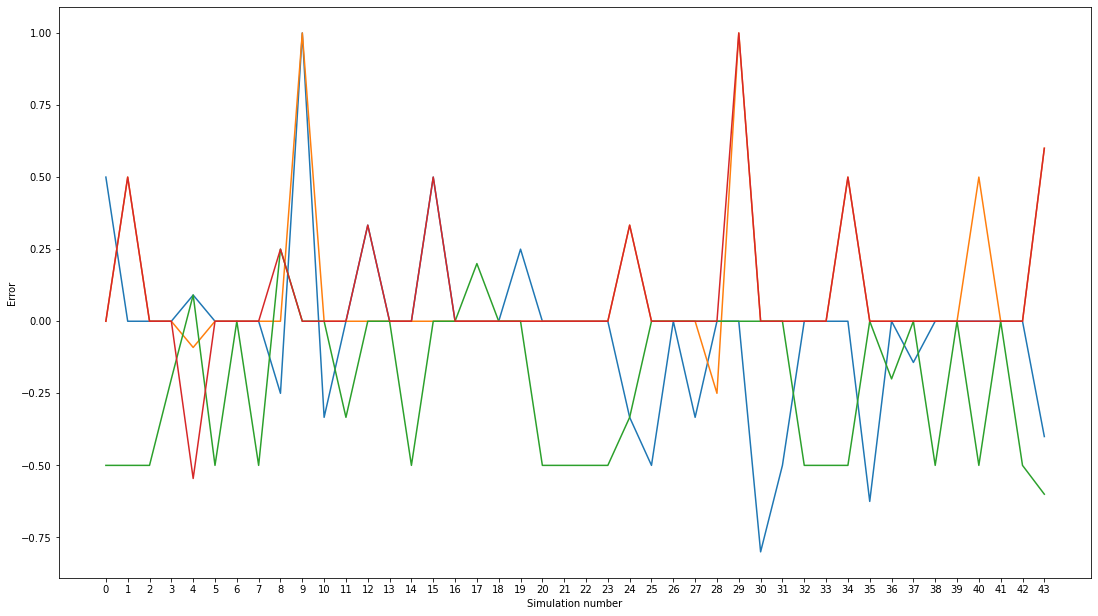

In [77]:
from matplotlib import pyplot as plt
for i in range(data.shape[0]):
    plt.plot([j for j in range(data.shape[1])], error[i])
plt.xticks([j for j in range(data.shape[1])])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel("Simulation number")
plt.ylabel("Error")
plt.show()

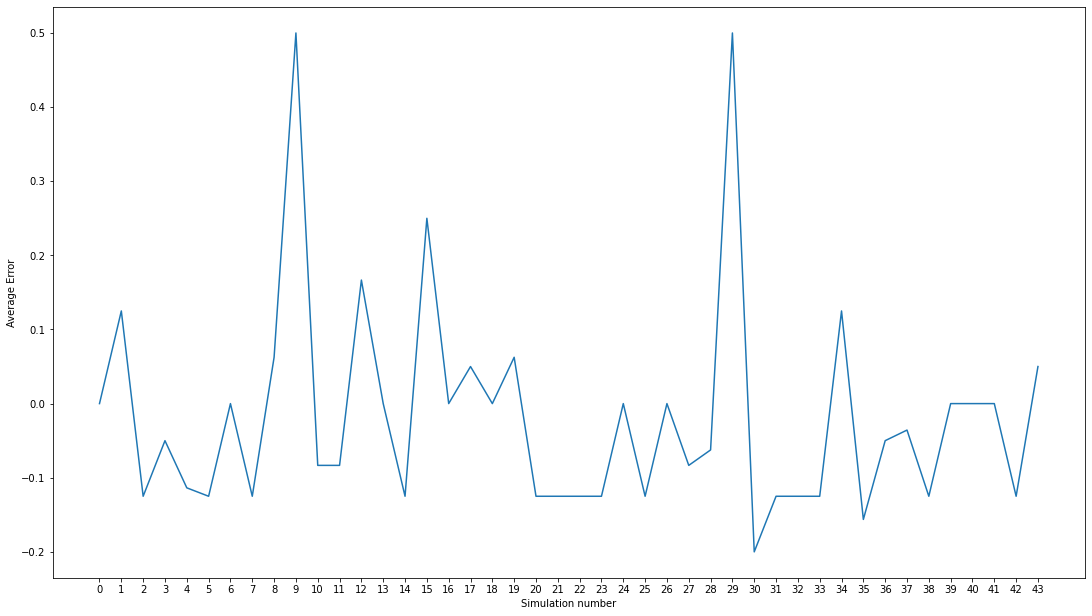

In [82]:
plt.plot([j for j in range(data.shape[1])], np.mean(error, axis=0))
plt.xticks([j for j in range(data.shape[1])])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel("Simulation number")
plt.ylabel("Average Error")
plt.show()

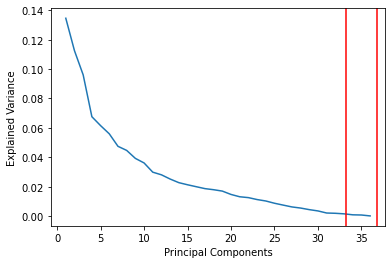

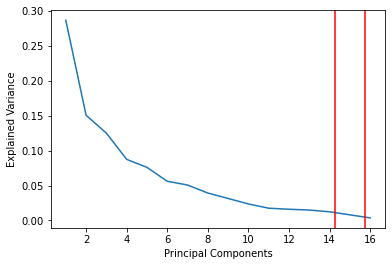

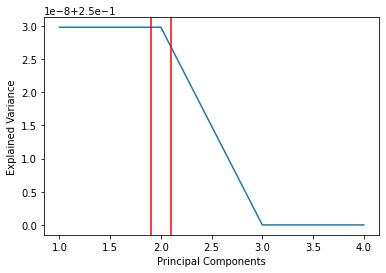

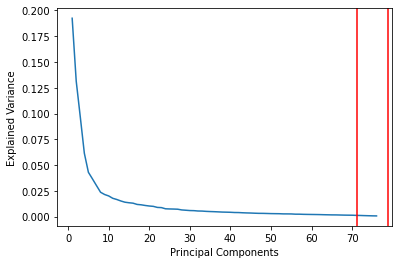

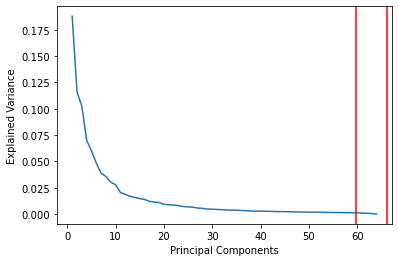

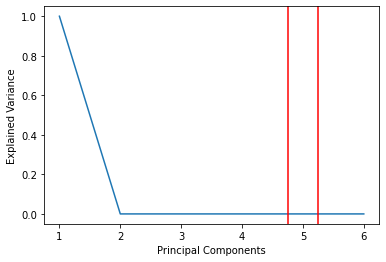

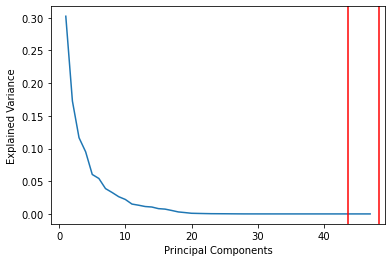

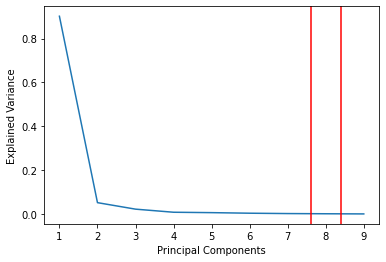

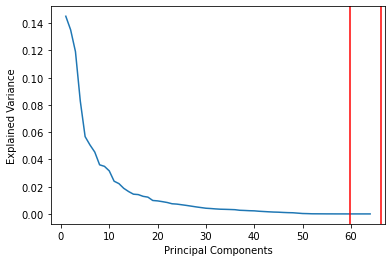

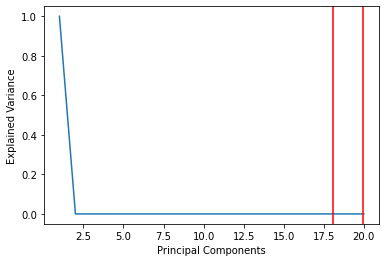

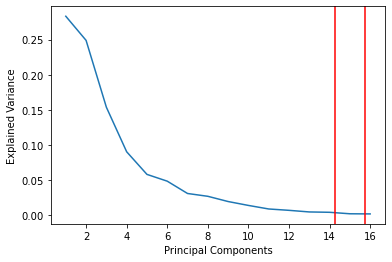

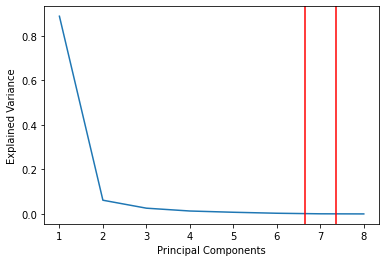

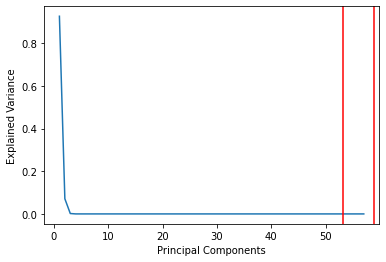

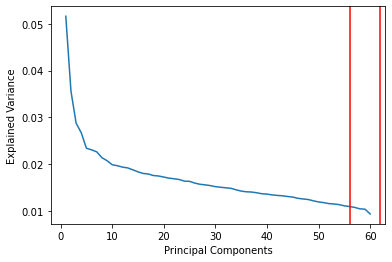

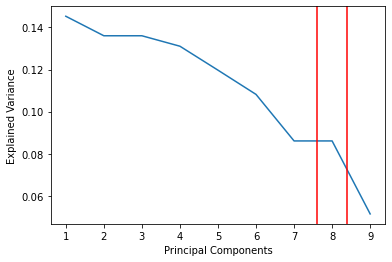

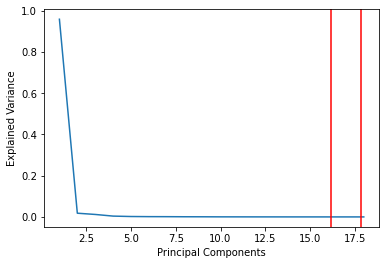

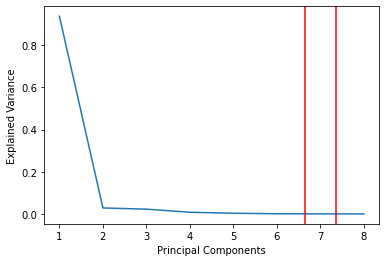

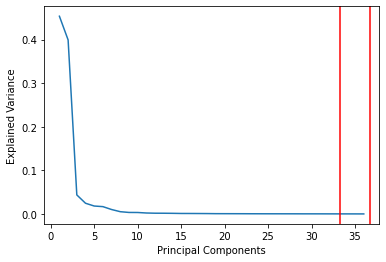

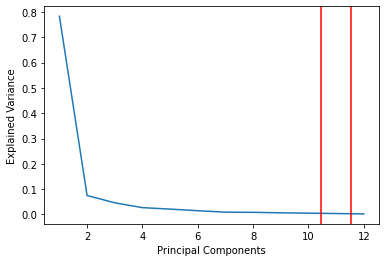

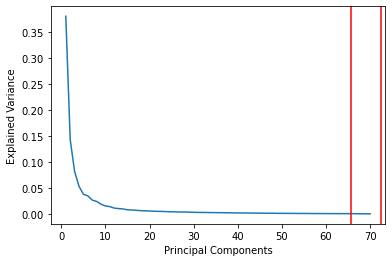

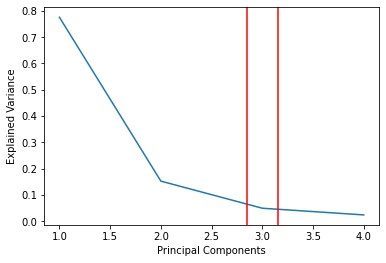

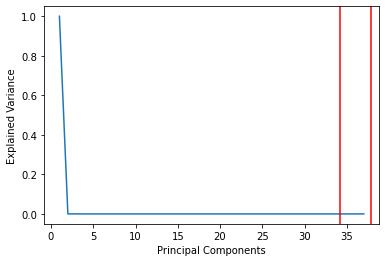

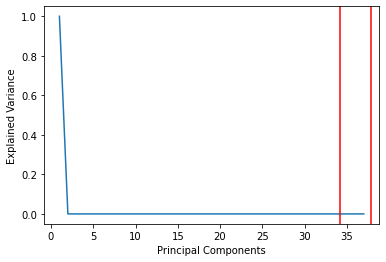

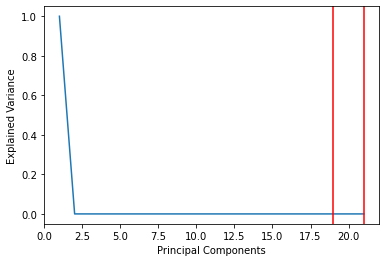

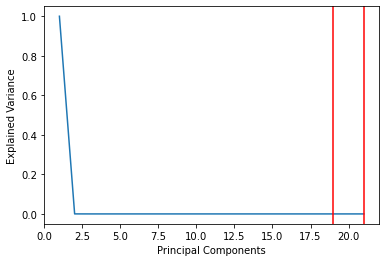

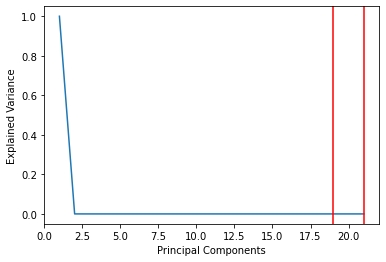

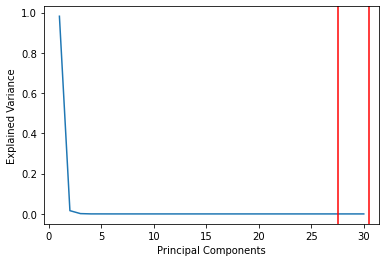

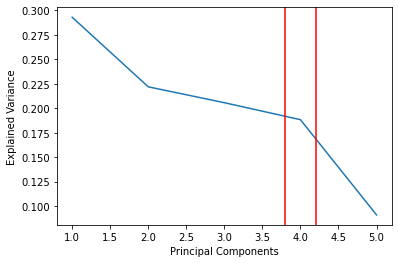

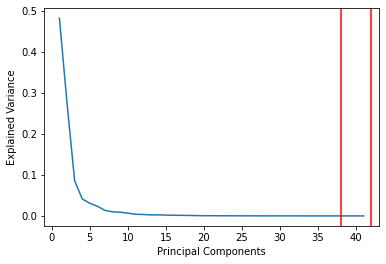

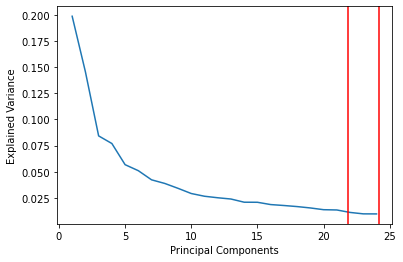

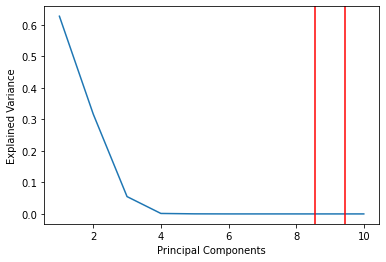

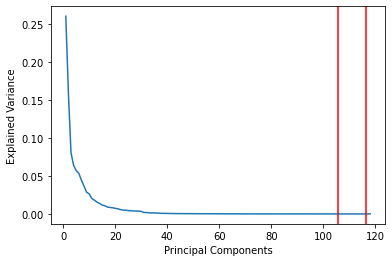

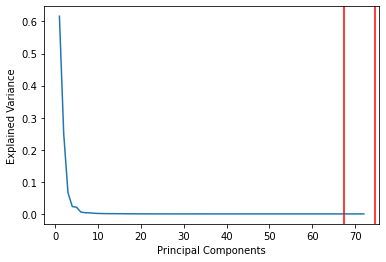

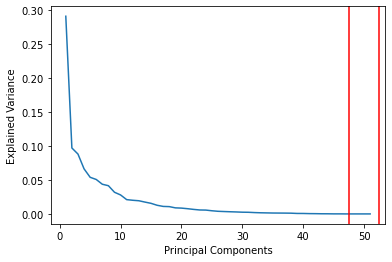

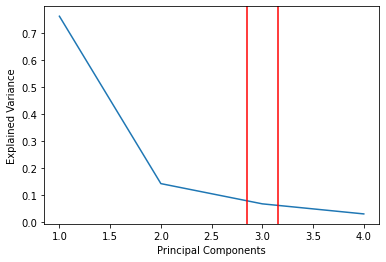

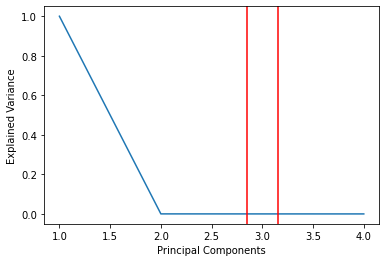

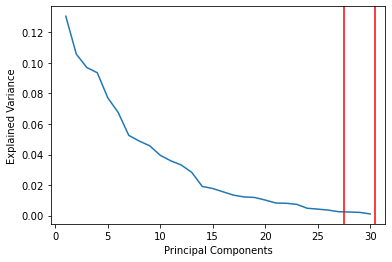

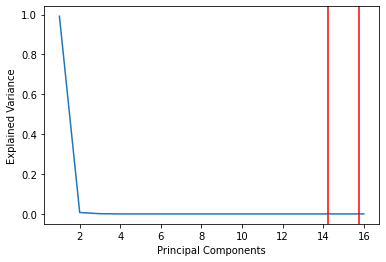

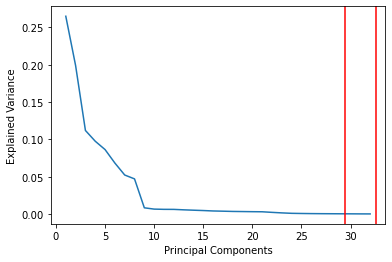

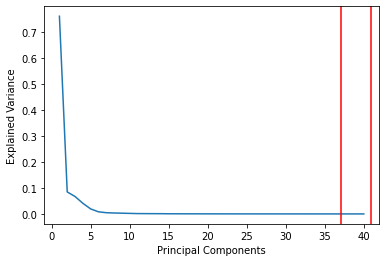

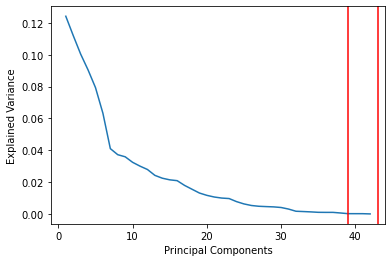

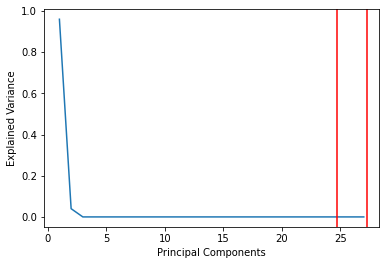

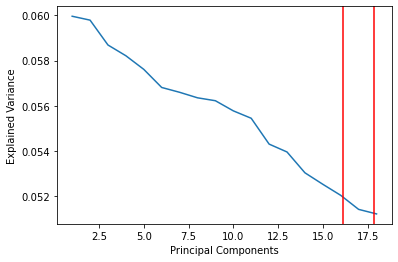

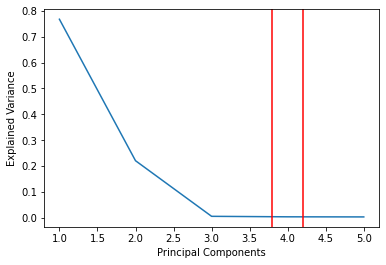

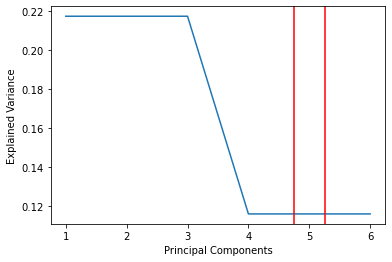

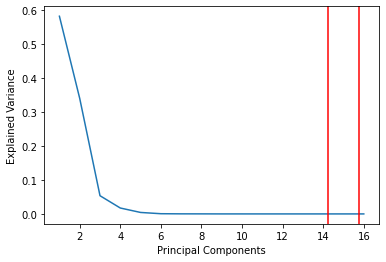

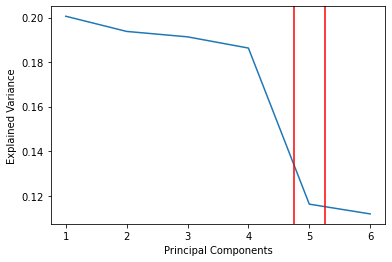

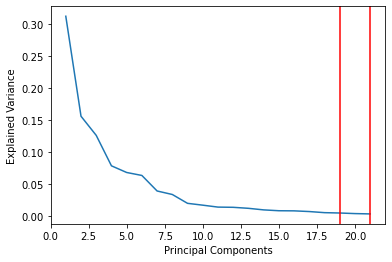

In [9]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
mins = []
counter = 0
for A in all_data:
    pca = PCA(n_components=min(A.shape[1], A.shape[0]))
    pca.fit(A)
    plt.plot([i for i in range(1, A.shape[1] + 1)], pca.explained_variance_ratio_)
    plt.xlabel("Principal Components")
    plt.ylabel("Explained Variance")
   
    m = list(pca.explained_variance_ratio_).index(min(pca.explained_variance_ratio_))
    plt.axvline(x= m*1.05, color='r', linestyle='-')
    plt.axvline(x= m*.95, color='r', linestyle='-')
    plt.show()
    counter += 1
    


In [5]:
mins

[35,
 15,
 2,
 75,
 63,
 5,
 46,
 8,
 63,
 19,
 15,
 7,
 56,
 59,
 8,
 17,
 7,
 35,
 11,
 69,
 3,
 36,
 36,
 20,
 20,
 20,
 29,
 4,
 40,
 23,
 9,
 111,
 71,
 50,
 3,
 3,
 29,
 15,
 31,
 39,
 41,
 26,
 17,
 4,
 5,
 15,
 5,
 20]

In [40]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LDA()
clf.fit(X, y)

LinearDiscriminantAnalysis()